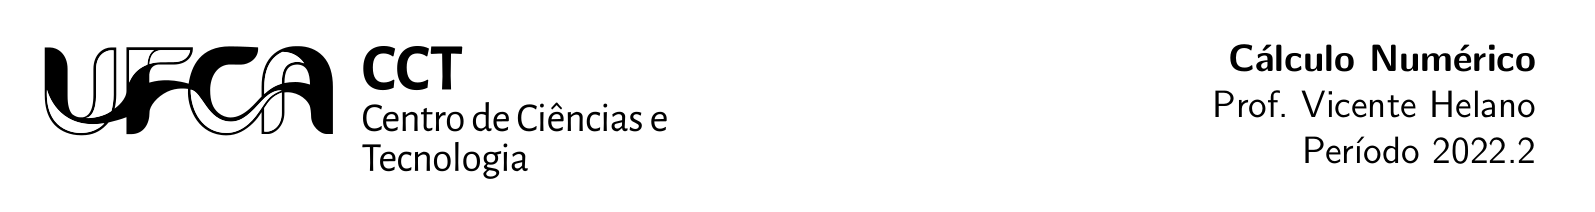

# Projeto 1

*O problema da troca de faixa*

## Equipe

1. Ariane Kevinny Muniz Ribeiro
2. Beltrano
3. Sicrano

## Situação problema

Veículos *autônomos* ou *não tripulados* estão cada vez mais em evidência pelo mundo *afora*.
Segundo [estimativas](https://edition.cnn.com/2012/09/18/tech/innovation/ieee-2040-cars/index.html), veículos autônomos constituirão cerca de 75% de todos os automóveis em circulação no mundo por volta de 2040.
Atualmente, no entanto, eles ainda estão sob forte experimentação e os custos de aquisição são astronômicos.

Acidentes [recentes](https://www.npr.org/2022/06/15/1105252793/nearly-400-car-crashes-in-11-months-involved-automated-tech-companies-tell-regul) têm levantado suspeitas sobre a segurança dos veículos autônomos.
Uma das manobras mais básicas que um veículo autônomo deve ser capaz de realizar é a *troca de faixa*.
Segundo Hegeman et al. (2005), cerca de 10% dos acidentes envolvendo veículos autônomos  ocorrem em situações de troca de faixa.
Uma troca de faixa pode ser usada para ultrapassar veículos mais lentos trafegando na mesma faixa ou evitar a colisão com eventuais obstáculos presentes na via.
Embora simples de ser realizada por um condutor humano, esta tarefa ainda representa um desafio para veículos pilotados por meio de softwares.
Neste contexto, vocês desenvolverão um algoritmo para o cálculo de trajetórias de troca de faixa que serão usadas por veículos autônomos.

Um modelo físico realista para o problema da troca de faixa deve levar em consideração condições climáticas, qualidade da pista e a interação com outros veículos e pedestres.
No entanto, por simplicidade, será considerada uma situação estática hipotética consistindo de uma pista dupla com sentido único, ocupada por um veículo tripulado (VT) posicionado à frente de um veículo autônomo (VA), conforme ilustrado abaixo.

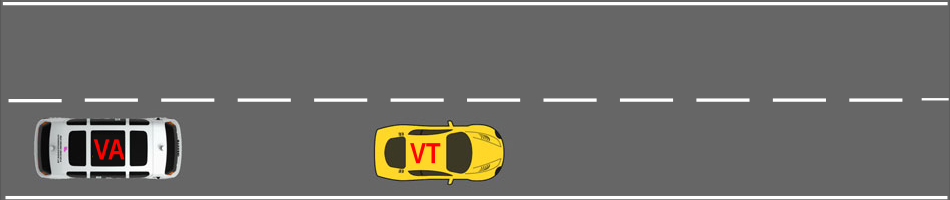

O trecho em consideração é referente a 28,5 metros de extensão de uma pista dupla com 6 metros de largura.
Nela, os veículos transitam a uma velocidade constante,
sendo a velocidade do veículo autônomo superior àquela do veículo tripulado.

## Clotoides

A [espiral de Cornu](https://pt.wikipedia.org/wiki/Espiral_de_Cornu), também conhecida como *clotoide*, é uma curva caracterizada pela variação linear da curvatura ao longo de seu comprimento.
Quando um carro a velocidade constante percorre uma curva definida por uma clotoide, a força centrífuga exercida em seus ocupantes cresce de modo suave, atingindo seu ápice apenas no final da curva, aumentando a sensação de conforto percebida durante a curva.
É, basicamente, este o motivo que tornou a clotoide popular no projeto geométrico de  rodovias e ferrovias.

A clotoide é uma curva transcendental, geralmente definida de modo paramétrico.
Quando expressa em função do ângulo tangente $\theta$, a clotoide com origem no ponto $(0,0)$ e fator de escala $s$ é dada por:

$$\mathbf{H}(\theta) =
s \begin{bmatrix}C(\theta)\\ S(\theta)\end{bmatrix}, \qquad \theta \ge 0,
\\tag{1}
$$

onde $C(\theta)$ e $S(\theta)$ são versões normalizadas das integrais de Fresnel:

$$
C(\theta) = \int_0^\theta \frac{\cos u}{\sqrt{u}} \, du, \qquad
S(\theta) = \int_0^\theta \frac{\operatorname{sen} u}{\sqrt{u}} \, du.
\\tag{2}
$$

(a) Utilize as Equações (1) e (2) para reproduzir a imagem disponível [aqui](https://commons.wikimedia.org/wiki/File:Euler_spiral.svg).
Utilize a `matplotlib` para plotar o gráfico e o pacote [scipy.integrate](https://docs.scipy.org/doc/scipy/tutorial/integrate.html) para a avaliação das integrais.

In [44]:
# Carregue os pacotes necessários para esta tarefa aqui.
import scipy.integrate as integrate
from scipy.special import fresnel
import numpy as np
import matplotlib.pyplot as plt



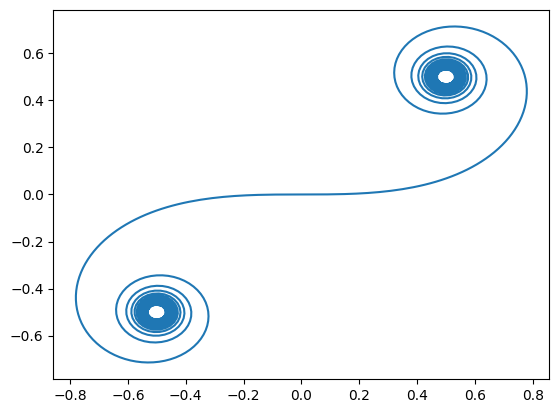

In [79]:
def C(U):
    out = np.ndarray(shape=(len(U),), dtype=float)
    for i, u in enumerate(U):
        x = (integrate.quad(lambda u: np.cos((np.pi * u**2)/2), 0, u))
        out[i] = x[0]
    return out
def S(U):
    out = np.ndarray(shape=(len(U),), dtype=float)
    for i, u in enumerate(U):
        x = (integrate.quad(lambda u: np.sin((np.pi * u**2)/2), 0, u))
        out[i] = x[0]
    return out

##Modificando defido a raiz quadrada
'''
def C(u):
    integrate.quad(lambda u: np.cos((np.pi * u**2)/2), 0, np.Inf) 
def S(u):
    integrate.quad(lambda u: np.sin((np.pi * u**2)/2), 0, np.Inf) 

t = np.linspace(-10, 10, 100)
y, x = S(t), C(t)

print(y)
print(x)

'''
t = np.linspace(-10, 10, 1000)
y, x = S(t), C(t)

plt.plot(x, y)
plt.show()




## Curva de transição

Considere
uma clotoide $\mathbf{H}$ com origem em $(0,0)$, $0 \le \theta \le \Theta$ e fator de escala $s$. 
O vetor tangente de $\mathbf{H}$ é:

$$
\mathbf{H}'(\theta) =
\frac{s}{\sqrt{\theta}}
\begin{bmatrix}
  \cos \theta\\
  \operatorname{sen} \theta
\end{bmatrix}, \qquad \theta \ge 0,
\label{eq:tangente}\tag{3}
$$

de onde podemos ver claramente que o parâmetro $\theta$ é justamente o ângulo que o vetor tangente de $\mathbf{H}$ faz com o eixo $x$.

A *curvatura* de $\mathbf{H}$ pode ser obtida por:

$$
\kappa(\theta) =
\frac{\|\mathbf{H}'(\theta) \times \mathbf{H}''(\theta)\|}{\|\mathbf{H}'(\theta)\|^3} = \frac{\sqrt{\theta}}{s}, \qquad \theta \ge 0.
\label{eq:curvatura}\tag{4}
$$

Com isso, seu centro de curvatura será:

\begin{align}
\mathbf{M}(\theta) &=
\mathbf{H}(\theta) + \frac{1}{\kappa(\theta)}
\begin{bmatrix}
  -\operatorname{sen}\theta\\
  \cos\theta
\end{bmatrix}\\
&=
s
\begin{bmatrix}
  C(\theta)\\
  S(\theta)
\end{bmatrix}
+
\frac{s}{\sqrt{\theta}}
\begin{bmatrix}
  -\operatorname{sen}\theta\\
  \cos\theta
\end{bmatrix}\\
&=
\frac{s}{\sqrt{\theta}}
\begin{bmatrix}
  C_I(\theta)\\
  S_I(\theta) + 1
\end{bmatrix}
, \qquad \theta > 0,
\tag{5}
\end{align}

onde
$C_I(\theta) = \sqrt{\theta}\, C(\theta) - \operatorname{sen}\theta$
e
$S_I(\theta) = \sqrt{\theta}\, S(\theta) - 1 + \cos \theta$.

Considera agora um círculo $\mathbf{G}$ definido pela equação $(x - X)^2 + (y - Y)^2 = R^2$, $Y - R > 0$,
tangente à clotoide $\mathbf{H}$ em seu ponto terminal $\mathbf{M}(\Theta)$.
Neste ponto, teremos:

$$
k(\Theta) = \frac{\sqrt{\Theta}}{s} = \frac{1}{R} \implies R = \frac{s}{\sqrt{\Theta}}.
\tag{6}
$$

Com isso, obtemos a equação:

$$
\mathbf{M}(\Theta) =
R
\begin{bmatrix}
  C_I(\Theta)\\
  S_I(\Theta) + 1
\end{bmatrix}
=
\begin{bmatrix}
  X\\
  Y
\end{bmatrix}
\tag{7}
$$

Fixando um valor para $Y$, é possível obter o valor correspondente de $\Theta$ usando um método numérico para o cálculo de zeros de funções.
Em seguida, a primeira equação pode ser usada para calcular o valor de $X$ e, com isso, o círculo e a clotoide ficam inteiramente definidos.

(b) Utilize o método de Newton e as Equações 1 a 7 para calcular a clotoide de transição $\mathbf{H}$  entre o eixo $x$ e um círculo $\mathbf{G}$ de raio $R = 145$, localizado a uma distância $Y = 170$ acima do eixo $x$.
Ao final, plote o gráfico de $\mathbf{G}$ e $\mathbf{H}$.

In [ ]:
# Carregue os pacotes necessários para esta tarefa aqui.

In [ ]:
# Digite o código para plotar o gráfico aqui.

## Cálculo da troca de faixa

Naturalmente, as clotóides podem ser utilizadas para resolver o problema da troca de faixa.
Um esquema bastante simples consiste em representar o trecho curvo da trajetória por duas clotóides consecutivas $\mathbf{H}_1$ e $\mathbf{H}_2$, conforme representado na figura abaixo.

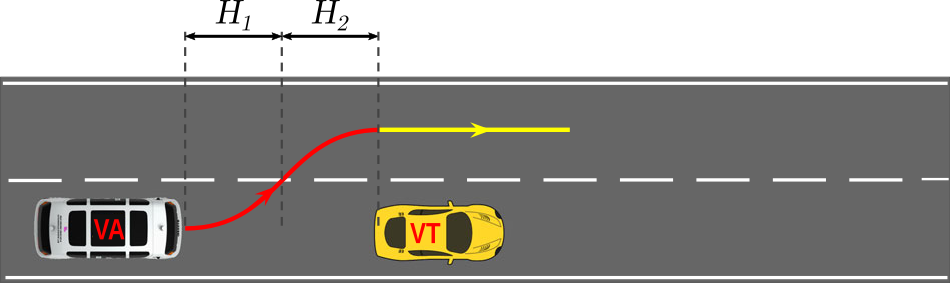

A clotoide $\mathbf{H}_1$ pode ser vista como uma curva de transição entre uma reta horizontal e a clotoide $\mathbf{H}_2$.
Sendo assim, em seu ponto inicial, a clotoide $\mathbf{H}_1$ tem curvatura nula e, no ponto de encontro com $\mathbf{H}_2$, ambas terão uma mesma curvatura $k \ne 0$.

Um modo simples de obter $\mathbf{H}_1$ é considerá-la como uma curva de transição entre o eixo $x$ e um círculo localizado inteiramente acima do eixo $x$, tangenciando o ponto final de $\mathbf{H}_1$, onde 
ambas as curvas terão a mesma curvatura.
Neste caso, a clotoide $\mathbf{H}_2$ seria obtida como uma reflexão de $\mathbf{H}_1$ em torno da reta $y = -x$.

(c) Apliquem a ideia acima para implementar um algoritmo que resolva a situação problema descrita no início deste projeto. Ao final, vocês devem plotar o gráfico da trajetória calculada sobrepondo-o à imagem disponibilizada contendo a estrada e os veículos envolvidos.

In [ ]:
# Carregue os pacotes necessários para esta tarefa aqui.

In [ ]:
# Digite o código para plotar o gráfico aqui.

## Considerações finais

(d) Por fim, vocês devem responder às seguintes perguntas:
1. O principal objetivo do projeto foi alcançado? Em que grau?
2. Quais foram as principais dificuldades enfrentadas?
3. Vocês acham que a solução obtida é viável na prática?
4. Surgiu alguma ideia de trabalhos futuros/melhorias?

Fiquem à vontade para tecer outros comentários que julgarem importantes.

*Digitem os comentários aqui*

## Saiba mais

Este projeto foi inspirado nos artigos:

* KAHYA, Ardam Haseeb Mohammed Ali; SCHMIDT, Klaus Werner. Clothoid-based lane change trajectory computation for self-driving vehicles. Cankaya University Journal of Science and Engineering, v. 14, n. 2, 2017.

* MEEK, Derek S.; WALTON, Desmond J. A note on finding clothoids. Journal of Computational and Applied Mathematics, v. 170, n. 2, p. 433-453, 2004.

As figuras utilizadas aqui são adaptações daquelas do artigo:

* MALAYJERDI, Ehsan et al. Practical path planning techniques in overtaking for autonomous shuttles. Journal of Field Robotics, v. 39, n. 4, p. 410-425, 2022.

Vicente Helano  
UFCA | Centro de Ciências e Tecnologia